# TaxiCab Data Analysis and Visualisations

This notebook deals with exploratory data analysis in form of descriptive statistics, plots and distributions.  
Based on this, outliers are identifed and the data is cleaned.  
Along with this certain data engineering is carried out to add extra fields to the raw data. 


## Exploratory Analysis and Data Cleaning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from scipy import stats
data = pd.read_csv('raw_data/yellow_tripdata_2021-01_raw_updated.csv', low_memory=False)
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,tripId
0,1.0,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.1,1.0,N,142,43,2.0,8.0,3.0,0.5,0.00,0.0,559893529209
1,1.0,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.2,1.0,N,238,151,2.0,3.0,0.5,0.5,0.00,0.0,993405808080
2,1.0,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.7,1.0,N,132,165,1.0,42.0,0.5,0.5,8.65,0.0,267031741304
3,1.0,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.6,1.0,N,138,132,1.0,29.0,0.5,0.5,6.05,0.0,355132875433
4,2.0,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,N,68,33,1.0,16.5,0.5,0.5,4.06,0.0,603494714228


Adding calculated fields to the data such as,
* date
* hour
* day
* month
* year
* weekday
* duration - Duration of the trip

In addition to these fields, the class of payment types is appended to the data

In [3]:
data['date'] = pd.to_datetime(data['tpep_pickup_datetime']).dt.date
data['hour'] = pd.to_datetime(data['tpep_pickup_datetime']).dt.hour
data['day'] = pd.to_datetime(data['tpep_pickup_datetime']).dt.day
data['month'] = pd.to_datetime(data['tpep_pickup_datetime']).dt.month
data['year'] = pd.to_datetime(data['tpep_pickup_datetime']).dt.year
data['weekday'] = pd.to_datetime(data['tpep_pickup_datetime']).dt.weekday
data['duration'] = pd.to_datetime(data['tpep_dropoff_datetime']) - pd.to_datetime(data['tpep_pickup_datetime'])
data['duration'] = data['duration'].dt.total_seconds() / 60


PAYMENT_TYPES = {
    1: 'Credit card',
    2: 'Cash',
    3: 'No charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided trip'
}

def get_payment_type(x: int):
    return PAYMENT_TYPES[x]

data['payment_type_class'] = data['payment_type'].apply(get_payment_type)
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tolls_amount,tripId,date,hour,day,month,year,weekday,duration,payment_type_class
0,1.0,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.1,1.0,N,142,43,2.0,...,0.0,559893529209,2021-01-01,0,1,1,2021,4,6.033333,Cash
1,1.0,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.2,1.0,N,238,151,2.0,...,0.0,993405808080,2021-01-01,0,1,1,2021,4,0.983333,Cash
2,1.0,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.7,1.0,N,132,165,1.0,...,0.0,267031741304,2021-01-01,0,1,1,2021,4,27.600000,Credit card
3,1.0,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.6,1.0,N,138,132,1.0,...,0.0,355132875433,2021-01-01,0,1,1,2021,4,15.216667,Credit card
4,2.0,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,N,68,33,1.0,...,0.0,603494714228,2021-01-01,0,1,1,2021,4,16.533333,Credit card


## Descriptive Statistics

In [4]:
data.describe(include='all')

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tolls_amount,tripId,date,hour,day,month,year,weekday,duration,payment_type_class
count,1.369765e+06,1369765,1369765,1.271413e+06,1369765,1.271413e+06,1271413,1.369765e+06,1.369765e+06,1.369765e+06,...,1.369765e+06,1.369765e+06,1369765,1.369765e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.369765e+06,1369765
unique,NaN,939018,935990,NaN,3787,NaN,2,NaN,NaN,NaN,...,NaN,NaN,36,NaN,NaN,NaN,NaN,NaN,NaN,6
top,NaN,2021-01-14 13:52:00,2021-01-27 00:00:00,NaN,0.8,NaN,N,NaN,NaN,NaN,...,NaN,NaN,2021-01-28,NaN,NaN,NaN,NaN,NaN,NaN,Credit card
freq,NaN,13,21,NaN,22942,NaN,1252433,NaN,NaN,NaN,...,NaN,NaN,56444,NaN,NaN,NaN,NaN,NaN,NaN,934473
mean,1.843999e+00,NaN,NaN,1.411508e+00,NaN,1.035081e+00,NaN,1.652472e+02,1.614956e+02,1.583443e+00,...,2.477432e-01,5.505093e+11,NaN,1.376327e+01,1.649426e+01,1.000139e+00,2.021000e+03,2.966594e+00,1.391168e+01,NaN
std,7.822027e-01,NaN,NaN,1.059833e+00,NaN,5.994840e-01,NaN,6.783849e+01,7.210800e+01,1.195230e+00,...,1.672755e+00,2.597719e+11,NaN,4.556054e+00,8.643281e+00,3.878942e-02,2.122358e-02,1.898354e+00,1.312008e+02,NaN
min,1.000000e+00,NaN,NaN,0.000000e+00,NaN,1.000000e+00,NaN,1.000000e+00,1.000000e+00,1.000000e+00,...,-3.112000e+01,1.000005e+11,NaN,0.000000e+00,1.000000e+00,1.000000e+00,2.008000e+03,0.000000e+00,-1.350846e+05,NaN
25%,1.000000e+00,NaN,NaN,1.000000e+00,NaN,1.000000e+00,NaN,1.240000e+02,1.070000e+02,1.000000e+00,...,0.000000e+00,3.256927e+11,NaN,1.100000e+01,9.000000e+00,1.000000e+00,2.021000e+03,1.000000e+00,5.566667e+00,NaN
50%,2.000000e+00,NaN,NaN,1.000000e+00,NaN,1.000000e+00,NaN,1.620000e+02,1.620000e+02,1.000000e+00,...,0.000000e+00,5.506215e+11,NaN,1.400000e+01,1.600000e+01,1.000000e+00,2.021000e+03,3.000000e+00,9.066667e+00,NaN
75%,2.000000e+00,NaN,NaN,1.000000e+00,NaN,1.000000e+00,NaN,2.360000e+02,2.360000e+02,2.000000e+00,...,0.000000e+00,7.756135e+11,NaN,1.700000e+01,2.400000e+01,1.000000e+00,2.021000e+03,5.000000e+00,1.461667e+01,NaN


In [5]:
data['VendorID'].value_counts()

VendorID
2.0    860651
1.0    410762
5.0     33062
3.0     32689
4.0     32601
Name: count, dtype: int64

## Inferences
The discriptive stats indicate a few anomalies such as,

* `trip_distance` in the raw data has a datatype of string as seen in the above table. For simplicity, this should be converted to float. 
* `fare_amount` `extra` `mta_tax` `tip_amount` and `tolls_amount` contain negative values (due to the min value being negative). For this analysis an assumption will be made that these fields are strictly positive. A negative value is possible if the trip involves a refund or promotional deal of some kind. 
* `duration` minimum value is negative. This indicates presence of entries where the duration of the trip is less than zero, which is not possible. 
* Data type of certain fields is incorrect. tripID, pickup/drop off locations are considered numeric fields. These are infact categorical and should not be considered numeric (continuous).
* `VendorID` is of type int instead of string. It also has 5 classes as opposed to the 2 specified in the metadata. 
* `PULocationID` and `DULocationID` are parsed as int.
* Year ranges from 2008 to 2021. For the purposes of this analysis, data from 2021 will be considered. 

In [6]:
def convert_distance_to_float(x: str|float):
    if type(x) == float:
        return x
    if x.endswith('km'):
        return float(x[:-2])
    return float(x)

def remove_negative_values(x: float):
    if x < 0:
        return np.nan
    return x

cleaned_data = data.copy(deep=True)
cleaned_data = cleaned_data[cleaned_data['year'] == 2021]
cleaned_data = cleaned_data[cleaned_data["VendorID"] <= 2]
cleaned_data['trip_distance'] = cleaned_data['trip_distance'].apply(convert_distance_to_float).astype(float)
cleaned_data['trip_distance'] = cleaned_data['trip_distance'].apply(remove_negative_values)
cleaned_data['duration'] = cleaned_data['duration'].apply(remove_negative_values)
cleaned_data['fare_amount'] = cleaned_data['fare_amount'].apply(remove_negative_values)
cleaned_data['extra'] = cleaned_data['extra'].apply(remove_negative_values)
cleaned_data['mta_tax'] = cleaned_data['mta_tax'].apply(remove_negative_values)
cleaned_data['tip_amount'] = cleaned_data['tip_amount'].apply(remove_negative_values)
cleaned_data['tolls_amount'] = cleaned_data['tolls_amount'].apply(remove_negative_values)
cleaned_data['tripId'] = cleaned_data['tripId'].astype(str)
cleaned_data['VendorID'] = cleaned_data['VendorID'].astype(str)
cleaned_data['RatecodeID'] = cleaned_data['RatecodeID'].astype(str)
cleaned_data['store_and_fwd_flag'] = cleaned_data['store_and_fwd_flag'].astype(str)
cleaned_data['payment_type'] = cleaned_data['payment_type'].astype(str)
cleaned_data['PULocationID'] = cleaned_data['PULocationID'].astype(str)
cleaned_data['DOLocationID'] = cleaned_data['DOLocationID'].astype(str)

cleaned_data.dropna(inplace=True, subset=['trip_distance', 'duration', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'tripId'])
cleaned_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tolls_amount,tripId,date,hour,day,month,year,weekday,duration,payment_type_class
0,1.0,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,1.0,N,142,43,2.0,...,0.0,559893529209,2021-01-01,0,1,1,2021,4,6.033333,Cash
1,1.0,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,1.0,N,238,151,2.0,...,0.0,993405808080,2021-01-01,0,1,1,2021,4,0.983333,Cash
2,1.0,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,N,132,165,1.0,...,0.0,267031741304,2021-01-01,0,1,1,2021,4,27.600000,Credit card
3,1.0,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,N,138,132,1.0,...,0.0,355132875433,2021-01-01,0,1,1,2021,4,15.216667,Credit card
4,2.0,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,N,68,33,1.0,...,0.0,603494714228,2021-01-01,0,1,1,2021,4,16.533333,Credit card


## Identifying Outliers

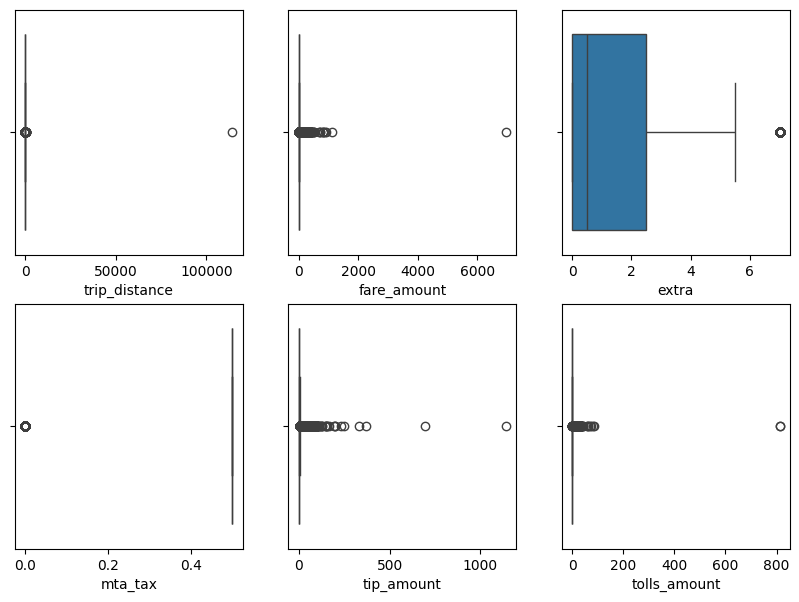

In [7]:
fig, ax = plt.subplots(2, 3, figsize=(10, 7))
cols = ['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount']
k = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(x=cleaned_data[cols[k]], ax=ax[i, j])
        k += 1
plt.show()

## Inference
`fare_amount`, `tip_amount`, `tolls_amount`, `mta_tax` contain significant outliers. These can be removed by dropping values outside 2 standard deviations from the mean of each column

`duration` is not included in this cleaning since duration can be affected by traffic flows leading to unpredictable values.

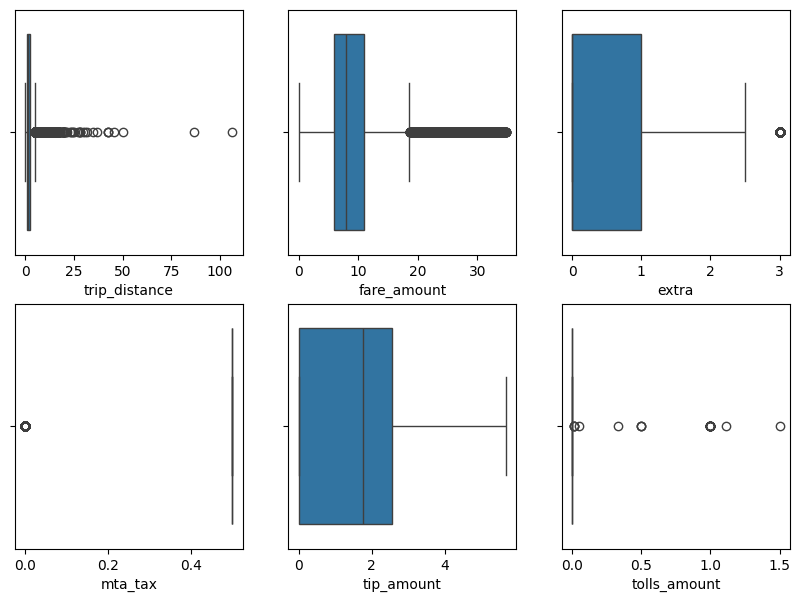

In [8]:
cleaned_data = cleaned_data[stats.zscore(cleaned_data['trip_distance']) < 2]
cleaned_data = cleaned_data[stats.zscore(cleaned_data['fare_amount']) < 2]
cleaned_data = cleaned_data[stats.zscore(cleaned_data['extra']) < 2]
cleaned_data = cleaned_data[stats.zscore(cleaned_data['mta_tax']) < 2]
cleaned_data = cleaned_data[stats.zscore(cleaned_data['tip_amount']) < 2]
cleaned_data = cleaned_data[stats.zscore(cleaned_data['tolls_amount']) < 2]

fig, ax = plt.subplots(2, 3, figsize=(10, 7))
cols = ['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount']
k = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(x=cleaned_data[cols[k]], ax=ax[i, j])
        k += 1
plt.show()

## Description of Cleaned Data

In [9]:
cleaned_data.describe()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,hour,day,month,year,weekday,duration
count,1.108746e+06,1.108746e+06,1.108746e+06,1.108746e+06,1.108746e+06,1.108746e+06,1.108746e+06,1.108746e+06,1.108746e+06,1.108746e+06,1108746.0,1.108746e+06,1.108746e+06
mean,1.430989e+00,1.994009e+00,9.241835e+00,8.329609e-01,4.989249e-01,1.648494e+00,2.302601e-05,1.355418e+01,1.658372e+01,1.000004e+00,2021.0,3.004832e+00,1.229944e+01
std,1.083380e+00,1.618534e+00,4.932242e+00,1.067309e+00,2.316007e-02,1.371794e+00,4.780968e-03,4.519945e+00,8.639903e+00,1.899387e-03,0.0,1.906872e+00,6.598249e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2021.0,0.000000e+00,0.000000e+00
25%,1.000000e+00,9.500000e-01,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,1.000000e+01,9.000000e+00,1.000000e+00,2021.0,1.000000e+00,5.300000e+00
50%,1.000000e+00,1.530000e+00,8.000000e+00,0.000000e+00,5.000000e-01,1.760000e+00,0.000000e+00,1.400000e+01,1.700000e+01,1.000000e+00,2021.0,3.000000e+00,8.333333e+00
75%,1.000000e+00,2.500000e+00,1.100000e+01,1.000000e+00,5.000000e-01,2.560000e+00,0.000000e+00,1.700000e+01,2.400000e+01,1.000000e+00,2021.0,5.000000e+00,1.266667e+01
max,8.000000e+00,1.064000e+02,3.479000e+01,3.000000e+00,5.000000e-01,5.670000e+00,1.500000e+00,2.300000e+01,3.100000e+01,2.000000e+00,2021.0,6.000000e+00,2.881770e+04


# Distribution of Key Parameters

Trip Distance and Fare Amount are identified as 2 key parameters

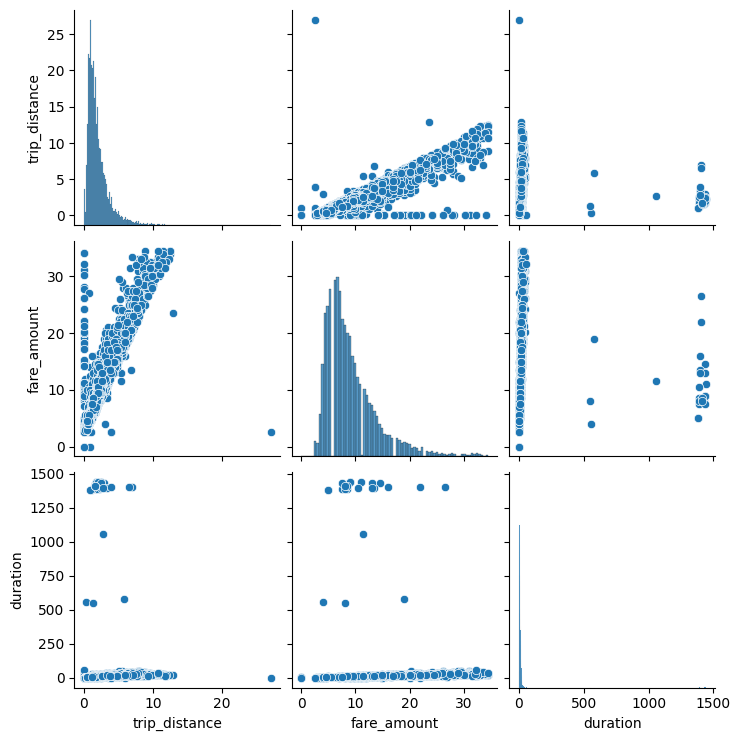

In [10]:
sns.pairplot(cleaned_data.loc[:, ['trip_distance','fare_amount', 'duration']].sample(10000))

Trip Distance and Far Distance seem to be highly correlated based on thier scatter plots. 

All three parameters have Right Skewed distributions, violating any assumptions of normality of data.

Duration metric indicates very high values. Investigating below

In [11]:
cleaned_data[cleaned_data['duration']>1500].head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tolls_amount,tripId,date,hour,day,month,year,weekday,duration,payment_type_class
302612,1.0,2021-01-09 00:46:44,2021-01-29 01:04:26,1.0,4.10,1.0,N,238,168,2.0,...,0.0,539056427269,2021-01-09,0,9,1,2021,5,28817.700000,Cash
344032,2.0,2021-01-10 10:56:18,2021-01-13 12:35:25,1.0,0.00,1.0,N,264,264,2.0,...,0.0,355364462339,2021-01-10,10,10,1,2021,6,4419.116667,Cash
591780,2.0,2021-01-15 18:35:33,2021-01-17 06:29:09,1.0,0.02,1.0,N,168,20,2.0,...,0.0,993766625444,2021-01-15,18,15,1,2021,4,2153.600000,Cash
750652,2.0,2021-01-20 00:18:37,2021-01-21 08:38:04,1.0,4.24,1.0,N,263,24,2.0,...,0.0,379806574875,2021-01-20,0,20,1,2021,2,1939.450000,Cash


In [12]:
28817.700000/60

480.295

$28817.70$ mins convert to $480$ hours i.e. $20$ days. 
A trip taking 20 days with only 4km covered sounds like an anomaly

The same is true for the other values with duration above 1500 mins

Dropping these values to clean the data

In [13]:
cleaned_data = cleaned_data[cleaned_data['duration']<1440] 

# Appending Surcharge Data

Surcharge data provided in a json file has the format  
`Dict[str: Dict[str : float]]`

Where the dict keys are tripIDs and the attached keys are the improvement and congestion surcharges. 

In [14]:
surcharges: dict = json.load(open('raw_data/surcharge_data.json'))
surcharged_data = cleaned_data.copy()
flattened_surcharges = []
for trip_id in surcharges.keys():
    flattened_surcharges.append({
        'tripId': trip_id,
        'improvement_surcharge': surcharges[trip_id]['improvement_surcharge'],
        'congestion_surcharge': surcharges[trip_id]['congestion_surcharge']
    })

surcharges_df = pd.DataFrame(flattened_surcharges)
surcharged_data = pd.merge(surcharged_data, surcharges_df, on='tripId')
surcharged_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,date,hour,day,month,year,weekday,duration,payment_type_class,improvement_surcharge,congestion_surcharge
0,1.0,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,1.0,N,142,43,2.0,...,2021-01-01,0,1,1,2021,4,6.033333,Cash,0.3,2.5
1,1.0,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,1.0,N,238,151,2.0,...,2021-01-01,0,1,1,2021,4,0.983333,Cash,0.3,0.0
2,2.0,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,N,68,33,1.0,...,2021-01-01,0,1,1,2021,4,16.533333,Credit card,0.3,2.5
3,1.0,2021-01-01 00:16:29,2021-01-01 00:24:30,1.0,1.60,1.0,N,224,68,1.0,...,2021-01-01,0,1,1,2021,4,8.016667,Credit card,0.3,2.5
4,1.0,2021-01-01 00:00:28,2021-01-01 00:17:28,1.0,4.10,1.0,N,95,157,2.0,...,2021-01-01,0,1,1,2021,4,17.000000,Cash,0.3,0.0


In [15]:
# Saving Surcharge Data for Visualisations
surcharged_data.to_csv('raw_data/surcharged_data.csv', index=False)

# Visualisations

Visualisation for the above data can be found at,
[Soham Sarfare - Tableau Public](https://public.tableau.com/app/profile/soham.sarfare/viz/VisualizingNYCTaxiCabTrips/ZoneWiseTripAnalysis?publish=yes)

The visualisations contain the following,
* Fare and Trips Summary - Interactive Dashboard explaining Fare and Trip summary broken down by Vendor ID, Payment Type Class, Busiest Hours of the day along with average tip per Vendor.
* Zone Wise Distribution of Trips - Interactive Dashboard showcasing distribution of number of trips and fare total over the boroughs and zones of NYC.
* Zone Wise Trip Analysis - Interactive Story detailing earnings and recommendations of the various zones and keypoints of NYC.

Geographical data was sourced from https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page 

# Does Congestion Surcharge have an Effect on Trip Distance?

From the graph below, congestion surcharge can be considered as a categorical variable with 4 levels.
Trip distance on the other hand is a continuous variable. 

When trying to analyse the effect of a categorical variable on a continuos variable, the best course of action is to conduct a One Way Analysis of Variance test. 

ANOVA requires a few assumptions,
* Normality: The data within each group should be normally distributed.
* Homogeneity of variance: The variance of the data within each group should be equal.
* Independence: The observations within each group should be independent.
* Random sampling: Observations within each group have been sampled randomly and are independent of each other.

Normality assumption is violated right away due to the skewness of Trip Distance data. 
Homogeneity of Variance is also violated due to the small sample size of categories 0.75 and 3.00.
Independence and Random sampling assumptions are upheld due to the independent nature of passengers.

congestion_surcharge
2.50    1019025
0.00      89714
0.75          2
3.00          1
Name: count, dtype: int64


<Axes: xlabel='trip_distance', ylabel='Count'>

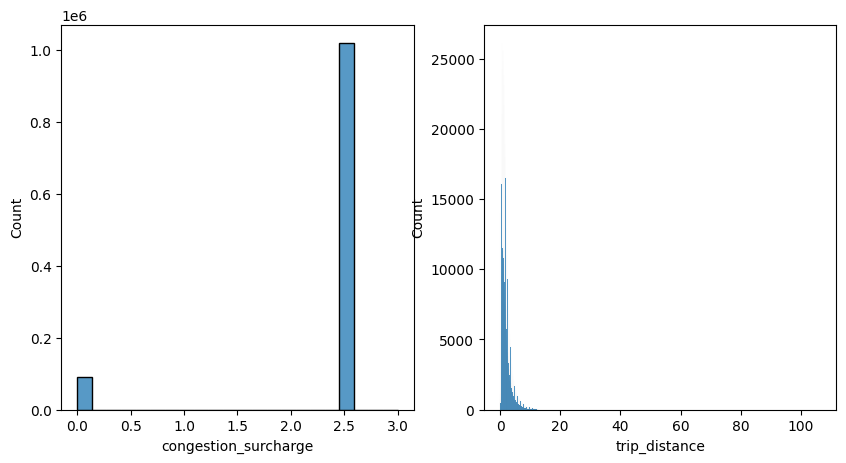

In [16]:
print(surcharged_data['congestion_surcharge'].value_counts())
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(surcharged_data['congestion_surcharge'], ax=ax[0])
sns.histplot(surcharged_data['trip_distance'], ax=ax[1])


## Fixing Assumptions by Taking Random Samples from Data

Dropping the 2 smallest categories from congestion surcharge column. This means 2 categories will be analysed on whether they have an effect on the trip distance. 

According to the central limit theorem, means of large samples, sampled from a random and identically distributed population tend towards normal.

Hence, taking 100 random samples of size 100 for each of the two categories


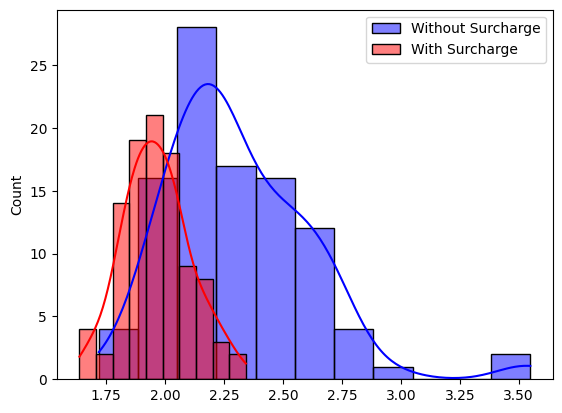

In [17]:
without_surcharge = surcharged_data[surcharged_data['congestion_surcharge'] == 0]['trip_distance']
with_surcharge = surcharged_data[surcharged_data['congestion_surcharge'] == 2.5]['trip_distance']

sample_size = 100
num_samples = 100
without_surcharge_sample_means = []
with_surcharge_sample_means = []
for i in range(num_samples):
    sample = without_surcharge.sample(sample_size)
    without_surcharge_sample_means.append(sample.mean())
    sample = with_surcharge.sample(sample_size)
    with_surcharge_sample_means.append(sample.mean())

sns.histplot(without_surcharge_sample_means, color='blue', label='Without Surcharge', kde=True)
sns.histplot(with_surcharge_sample_means, color='red', label='With Surcharge', kde=True)
plt.legend()
plt.show()

## Experiment Setup
With the underlying data approximating normal distribution, an ANOVA test can now be performed with the following null and alternate hypothesis,

$H_0$: The congestion surcharge has no effect on the mean of trip distance.   
$H_1$: The congestion surhcarge has an effect on the mean of trip distance. 

In [18]:
# Perform One way Anova Test
grand_mean = np.mean(with_surcharge_sample_means + without_surcharge_sample_means)

ss_between = sample_size * (np.mean(with_surcharge_sample_means) - grand_mean) ** 2 + sample_size * (np.mean(without_surcharge_sample_means) - grand_mean) ** 2
ss_within = np.sum((without_surcharge_sample_means - np.mean(without_surcharge_sample_means)) ** 2) + np.sum((with_surcharge_sample_means - np.mean(with_surcharge_sample_means)) ** 2)

df_between = 1
df_within = 2 * num_samples - 2

ms_between = ss_between / df_between
ms_within = ss_within / df_within

f = ms_between / ms_within

p_value = 1 - stats.f.cdf(f, df_between, df_within)

print(f"Withing Group SS: {ss_within}")
print(f"Between Group SS: {ss_between}")
print(f"MS Within: {ms_within}")
print(f"MS Between: {ms_between}")
print(f"F Value: {f}")
print(f"P Value: {p_value}")


Withing Group SS: 11.390153828600003
Between Group SS: 6.098009799200003
MS Within: 0.05752602943737375
MS Between: 6.098009799200003
F Value: 106.00435765932114
P Value: 1.1102230246251565e-16


## Results
At a signifance level of $0.05$, the calculated p value for this test is below the significant level. 

This leads to the rejection of the null hypothesis.   
Hence,  
Congestion Surcharge has an effect on the Mean of Trip Distance. 